# Assignment - 14  Decision Trees (Company Data)

## Import Necessary Data

In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
company = pd.read_csv(r'D:\Downloads\Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Understanding

In [3]:
company.shape

(400, 11)

In [4]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

## Data Preparation

In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


#### The Mean of the Sales is 7.49 
#### Taking below 7.49 as low and more than 7.49 as high

In [7]:
company.loc[company['Sales'] >=7.49,'sale']= 'high'
company.loc[company['Sales'] <7.49,'sale']= 'low'

In [8]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [9]:
company1 =company.drop('Sales' ,axis=1)

In [10]:
company1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,139,23,3,37,120,Medium,55,11,No,Yes,low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [11]:
le = LabelEncoder()
company1['ShelveLoc'] = le.fit_transform(company1['ShelveLoc'])
company1['Urban'] = le.fit_transform(company1['Urban'])
company1['US'] = le.fit_transform(company1['US'])
company1['sale'] = le.fit_transform(company1['sale'])

In [12]:
company1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [13]:
x = company1.drop('sale' , axis=1)
y = company1[['sale']]

In [14]:
x.shape , y.shape

((400, 10), (400, 1))

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.20 , random_state=12 , shuffle= True)

In [16]:
x_train.shape , y_train.shape

((320, 10), (320, 1))

In [17]:
x_test.shape , y_test.shape

((80, 10), (80, 1))

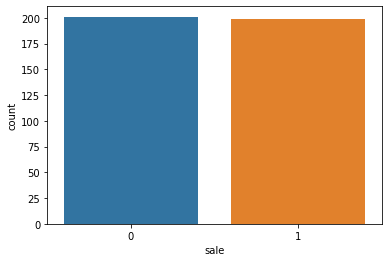

In [18]:
ax = sns.countplot(x='sale',  data=company1)

<BarContainer object of 400 artists>

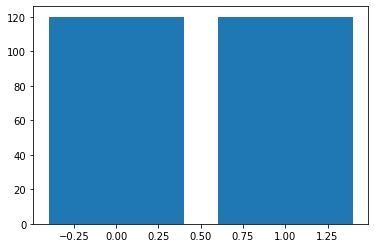

In [19]:
plt.bar(company1.sale,company1.Income)

## Model Training

In [20]:
decisiontree = DecisionTreeClassifier(criterion='gini' , max_depth=3)

In [21]:
decisiontree.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=3)

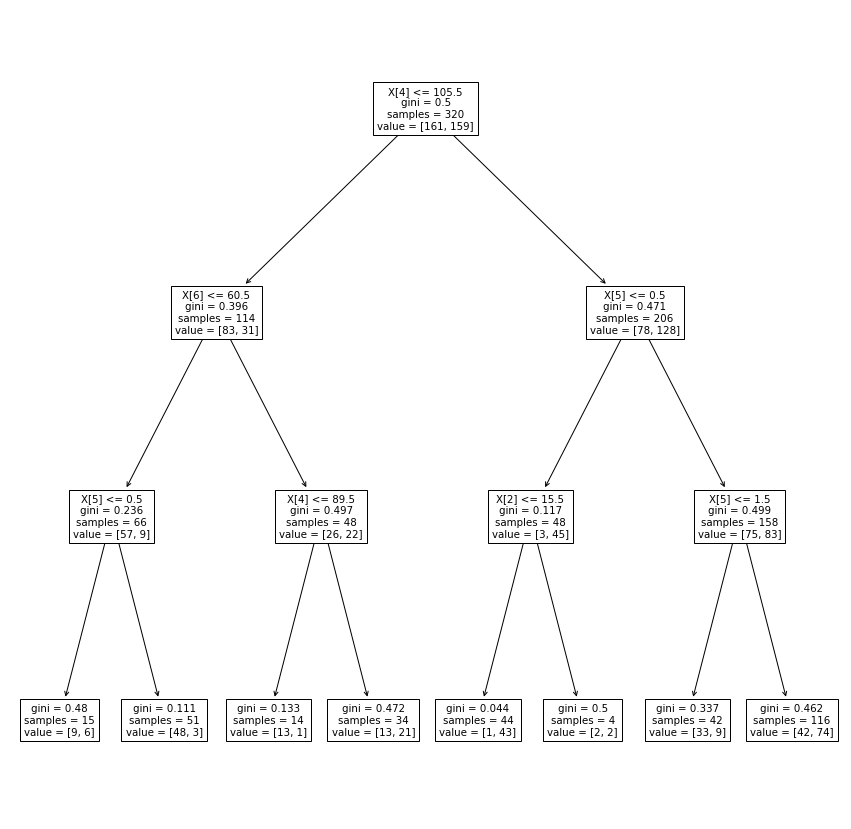

In [22]:
plt.figure(figsize=(15,15))
plot_tree(decision_tree=decisiontree)
plt.show()

In [23]:
decisiontree.feature_importances_

array([0.        , 0.        , 0.0290276 , 0.        , 0.41424713,
       0.45660622, 0.10011906, 0.        , 0.        , 0.        ])

##  Model Testing // Model Evaluation                                                                                               

In [24]:
y_pred = decisiontree.predict(x_test)

In [25]:
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

In [26]:
y_pred.shape

(80,)

In [27]:
pd.Series(y_pred).value_counts()

1    46
0    34
dtype: int64

In [28]:
accuracy_score(y_test,y_pred)

0.775

In [29]:
confusion_matrix(y_test,y_pred)

array([[28, 12],
       [ 6, 34]], dtype=int64)

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        40
           1       0.74      0.85      0.79        40

    accuracy                           0.78        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.78      0.78      0.77        80



In [31]:
y_pred=y_pred.reshape(80,1)

In [32]:
np.mean(y_pred==y_test)

sale    0.775
dtype: float64